In [222]:
from scipy.io import loadmat
import h5py
import os
import json
import numpy as np
from tifffile import imread

In [223]:
pth_crop_info_dir = r'\\10.99.68.178\andreex\data\monkey fetus\gestational 40\2_5x\cropped_images\bounding_boxes'
crop_mat_list = sorted(os.listdir(pth_crop_info_dir))
crop_mat_list = [file for file in crop_mat_list if 'monkey' in file]

In [224]:
crop_mat_list

['monkey_fetus_40_0001.mat',
 'monkey_fetus_40_0002.mat',
 'monkey_fetus_40_0003.mat',
 'monkey_fetus_40_0004.mat',
 'monkey_fetus_40_0005.mat',
 'monkey_fetus_40_0006.mat',
 'monkey_fetus_40_0007.mat',
 'monkey_fetus_40_0008.mat',
 'monkey_fetus_40_0009.mat',
 'monkey_fetus_40_0010.mat',
 'monkey_fetus_40_0011.mat',
 'monkey_fetus_40_0012.mat',
 'monkey_fetus_40_0013.mat',
 'monkey_fetus_40_0014.mat',
 'monkey_fetus_40_0015.mat',
 'monkey_fetus_40_0016.mat',
 'monkey_fetus_40_0017.mat',
 'monkey_fetus_40_0018.mat',
 'monkey_fetus_40_0019.mat',
 'monkey_fetus_40_0020.mat',
 'monkey_fetus_40_0021.mat',
 'monkey_fetus_40_0023.mat',
 'monkey_fetus_40_0024.mat',
 'monkey_fetus_40_0025.mat',
 'monkey_fetus_40_0026.mat',
 'monkey_fetus_40_0027.mat',
 'monkey_fetus_40_0028.mat',
 'monkey_fetus_40_0029.mat',
 'monkey_fetus_40_0030.mat',
 'monkey_fetus_40_0031.mat',
 'monkey_fetus_40_0032.mat',
 'monkey_fetus_40_0033.mat',
 'monkey_fetus_40_0034.mat',
 'monkey_fetus_40_0035.mat',
 'monkey_fetus

In [225]:
len(crop_mat_list)

1154

In [321]:
# sometimes loading .mat file works with loadmat function from scipi.io, sometimes it doesn't and needs h5py module, so both cases are accounted for here

crop_data = []

for i, file in enumerate(sorted(crop_mat_list)):
    mat_file_name = os.path.join(pth_crop_info_dir, file)
    try:
        data = loadmat(mat_file_name)

        #print('scipy.io loadmat')
        bb = [int(x) for x in data['bb']]
        crop_data.append(bb)
        #print(bb)

    except:
        data = h5py.File(mat_file_name, 'r')

        #print('h5py')
        bb = [int(x) for x in data['bb'][()]]
        crop_data.append(bb)
        #print(bb)

In [322]:
pth_json_folder = r'\\10.99.68.178\andreex\data\monkey fetus\gestational 40\StarDist_11_21_23\json'
jsons = sorted(os.listdir(pth_json_folder))
jsons = [f for f in jsons if f.endswith('.json')]

In [323]:
print(f'length crop data: {len(crop_data)}')
print(f'length jsons: {len(jsons)}')

length crop data: 1154
length jsons: 1154


In [324]:
# ensure everything matches up between json names and crop_mat names

for i, file_name in enumerate(crop_mat_list):
    if file_name[:-4] != jsons[i][:-5]:
        print(f'crop_mat_list: {file_name[:-4]}, json: {jsons[i][:-5]}')

In [396]:
model1_pth = r'\\10.99.68.178\andreex\data\monkey fetus\gestational 40\5x\cropped_images\classification_MODEL1_6_21_2023_all_annotations'
model1 = sorted(os.listdir(model1_pth))
model1 = [im for im in model1 if im.endswith('.tif')]

# model2_prefix = r'\\10.99.68.178\andreex\data\monkey fetus\gestational 40\10x\cropped_images'


In [397]:
# pixel res:
pth_pixel_res = r'\\10.99.68.178\andreex\data\monkey fetus\gestational 40\segmentation_analysis\pix_res_info'
pixel_res_info = sorted(os.listdir(pth_pixel_res))
pixel_res_files = [file for file in pixel_res_info if file.endswith('.mat')]

pixel_res_info = []

for i, file in enumerate(pixel_res_files):
    mat_file_name = os.path.join(pth_pixel_res, file)
    try:
        data = loadmat(mat_file_name)

        #print('scipy.io loadmat')
        x = float(data['pix_res']['x'][0][0][0])
        y = float(data['pix_res']['x'][0][0][0])
        pixel_res_info.append([x, y])

    except:
        data = h5py.File(mat_file_name, 'r')

        #print('h5py')
        x = float(data['pix_res'][()]['x'][0][0][0])
        y = float(data['pix_res'][()]['x'][0][0][0])
        pixel_res_info.append([x, y])

In [405]:
all_cells = []

for i, file in enumerate(jsons):

    # while debugging, just do once in loop
    i = 20
    file = jsons[i]

    print(file)

    pix_res = pixel_res_info[i][0]  # this is assuming x and y pix size are equal
    downsize10x = 1/pix_res
    downsize5x = 2/pix_res
    print(downsize5x)
    downsize2_5x = 4/pix_res

    m1_im_pth = os.path.join(model1_pth, model1[i])
    print(model1[i])
    m1_im = imread(m1_im_pth)
    print(m1_im.shape)

    crop_file_data = [num*downsize2_5x for num in crop_data[i]]  # multiple bounding box data by 2_5x crop ratio to get offsets for 20x points
    print(crop_file_data)
    #print(crop_file_data)

    x_offset = crop_file_data[0] - 1  # 0 to 1 indexing fix, probably right idk
    y_offset = crop_file_data[2] - 1

    print(f'x_offset: {x_offset}')
    print(f'y_offset: {y_offset}')

    fname = os.path.join(pth_json_folder, file)
    with open(fname, 'r') as file_n:
        data = json.load(file_n)

    centroids = []
    contours = []


    print([0, (crop_file_data[1] - 1)])
    print([0, (crop_file_data[3] - 1)])

    print([0, (crop_file_data[1] - x_offset)/downsize5x])
    print([0, (crop_file_data[3] - y_offset)/downsize5x])

    for entry in data:
        cent = entry['centroid'][0]
        cent = [cent[0] - y_offset, cent[1] - x_offset]  # coord might be backwards, idk
        cent = [num/downsize5x for num in cent]

        x_end = (crop_file_data[1] - x_offset)/downsize5x
        y_end = (crop_file_data[3] - y_offset)/downsize5x

        if (0 <= cent[0] < y_end) and (0 <= cent[1] < x_end) and (m1_im[round(cent[0]), round(cent[1])] == 18):
            centroids.append(cent)
            c = entry['contour'][0]
            contour = []
            for j in range(len(c[0])):
                point = [c[0][j] - y_offset, c[1][j] - x_offset]
                point = [num/downsize5x for num in point]
                contour.append(point)
            contours.append(contour)

    centroids = np.array(centroids)
    contours = np.array(contours)

    all_cells.append([centroids, contours])

    break

    #print(len(centroids))
    #print(len(contours))
    #print(len(contours[0]))

monkey_fetus_40_0021.json
4.5292
monkey_fetus_40_0021.tif
(5873, 8053)
[4991.178400000001, 41460.296800000004, 5534.682400000001, 32130.144800000002]
x_offset: 4990.178400000001
y_offset: 5533.682400000001
[0, 41459.296800000004]
[0, 32129.144800000002]
[0, 8052.2207895434085]
[0, 5872.220789543407]


In [406]:
print(len(all_cells))
print(len(all_cells[0]))

1
2


In [407]:
num = 0

slide_name = jsons[20]
slide = all_cells[num]
slide_centroids = slide[0]
slide_contours = slide[1]

print(len(slide_centroids))
print(len(slide_contours))

19706
19706


In [408]:
m1_im.shape

(5873, 8053)

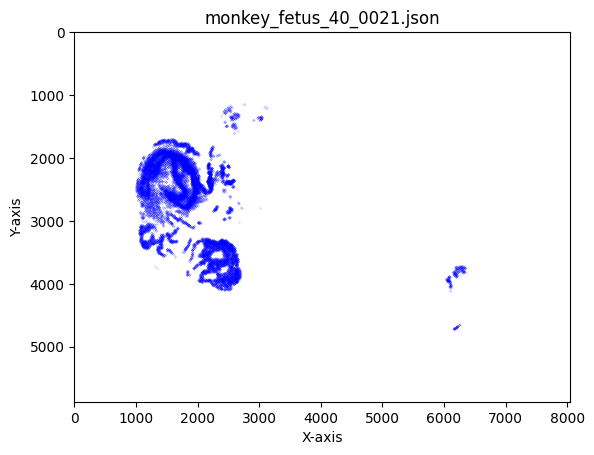

In [410]:
import matplotlib.pyplot as plt
# Extract x and y coordinates

x = slide_centroids[:, 1]
y = slide_centroids[:, 0]

# Create scatter plot|
plt.scatter(x, y, marker='o', color='blue', s=.01)

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title(slide_name)

plt.xlim(0, m1_im.shape[1])
plt.ylim(0, m1_im.shape[0])

plt.gca().invert_yaxis()

# Show the plot
plt.show()

In [374]:
max(x)

8029.193146692571

In [375]:
max(y)

5865.12355382849

In [411]:
# TEST pickle file, see if right coordinates...

In [412]:
import pandas as pd

In [675]:
pth = r'\\10.99.68.178\andreex\data\monkey fetus\gestational 40\segmentation_analysis\test_new_features\monkey_fetus_40_0895_new.pickle'
loaded_df = pd.read_pickle(pth) ## change back to (not2)

In [784]:
classification = 18

In [785]:
loaded_df.head()
loaded_df2 = loaded_df[loaded_df['Class'] == classification]
loaded_df2.head()

,Centroid_x,Centroid_y,Class,Area,Perimeter,Circularity,Aspect Ratio,compactness,eccentricity,euler_number,extent,form_factor,maximum_radius,mean_radius,median_radius,minor_axis_length,orientation_degrees,Image ID
492,857.092113,1523.876534,18,7.502273,10.616238,0.836491,1.955567,15.022715,0.859366,0.043940,0.769288,1.195470,2.872617,1.464317,1.288130,2.233138,6634.301530,895
5288,704.305749,4727.091230,18,3.169358,6.870699,0.843683,1.420667,14.894657,0.710304,0.495426,0.771226,1.185279,1.245068,0.998329,1.014369,1.700782,6433.460747,895
5466,700.773117,4723.558598,18,6.160650,9.160175,0.922633,1.426231,13.620124,0.713015,0.491466,0.775298,1.083855,2.002535,1.380868,1.334047,2.360390,3306.999028,895
5534,705.630487,4736.364391,18,2.924501,6.595929,0.844714,1.230088,14.876479,0.582334,0.621721,0.770575,1.183833,1.240882,0.960649,0.909809,1.756508,2983.264453,895
5611,710.046277,4731.507021,18,6.870954,9.658339,0.925597,1.373306,13.576501,0.685397,0.528508,0.770977,1.080384,1.881483,1.471617,1.472046,2.547441,4003.400088,895


In [786]:
cols = loaded_df2.columns
cols = [col for col in cols if col not in ['Centroid_x', 'Centroid_y', 'Class', 'Image ID']]
print(cols)

['Area', 'Perimeter', 'Circularity', 'Aspect Ratio', 'compactness', 'eccentricity', 'euler_number', 'extent', 'form_factor', 'maximum_radius', 'mean_radius', 'median_radius', 'minor_axis_length', 'orientation_degrees']


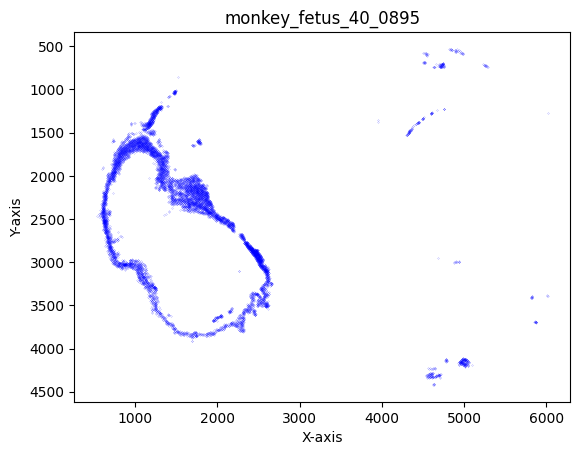

In [787]:
classification = 18

y = np.where(loaded_df['Class'] == classification, loaded_df['Centroid_x'], np.nan)
x = np.where(loaded_df['Class'] == classification, loaded_df['Centroid_y'], np.nan)
#y = loaded_df['Centroid_x']
#x = loaded_df['Centroid_y']

# Create scatter plot|
plt.scatter(x, y, marker='o', color='blue', s=.01)

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('monkey_fetus_40_0895')

#plt.xlim(0, max(x))
#plt.ylim(0, max(y))

plt.gca().invert_yaxis()

# Show the plot
plt.show()

In [788]:
features_df = loaded_df2[cols]
features_df.head()

,Area,Perimeter,Circularity,Aspect Ratio,compactness,eccentricity,euler_number,extent,form_factor,maximum_radius,mean_radius,median_radius,minor_axis_length,orientation_degrees
492,7.502273,10.616238,0.836491,1.955567,15.022715,0.859366,0.043940,0.769288,1.195470,2.872617,1.464317,1.288130,2.233138,6634.301530
5288,3.169358,6.870699,0.843683,1.420667,14.894657,0.710304,0.495426,0.771226,1.185279,1.245068,0.998329,1.014369,1.700782,6433.460747
5466,6.160650,9.160175,0.922633,1.426231,13.620124,0.713015,0.491466,0.775298,1.083855,2.002535,1.380868,1.334047,2.360390,3306.999028
5534,2.924501,6.595929,0.844714,1.230088,14.876479,0.582334,0.621721,0.770575,1.183833,1.240882,0.960649,0.909809,1.756508,2983.264453
5611,6.870954,9.658339,0.925597,1.373306,13.576501,0.685397,0.528508,0.770977,1.080384,1.881483,1.471617,1.472046,2.547441,4003.400088


In [789]:
classes = np.array(loaded_df2['Class'])
classes

array([18, 18, 18, ..., 18, 18, 18], dtype=uint8)

In [790]:
print(len(classes))

9844


In [791]:
print(features_df.shape)

(9844, 14)


In [792]:
max(classes)

18

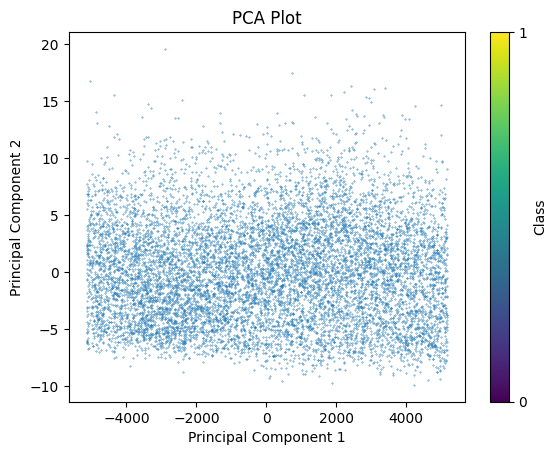

In [793]:
import numpy as np
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

pca = PCA(n_components=2)
transformed_features = pca.fit_transform(features_df)

class_colors = ListedColormap(['red', 'green', 'blue', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'black', 'gray',
                               'pink', 'brown', 'olive', 'teal', 'coral', 'navy', 'lime', 'indigo', 'tan', 'salmon'])


# Plot the transformed features
scatter = plt.scatter(transformed_features[:, 0], transformed_features[:, 1], s=.1) # c=classes, cmap=class_colors, s=.1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot')

cbar = plt.colorbar(scatter, ticks=np.arange(max(classes)+1))
cbar.set_label('Class')

plt.show()

C:\Users\Donald\anaconda3\envs\monkey_nuc_segment_v6\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


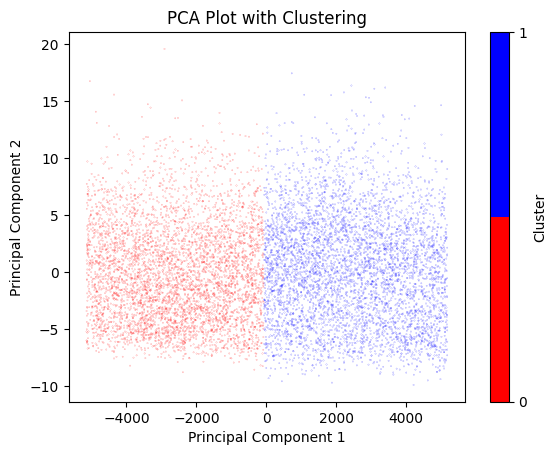

In [794]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Assuming features_df is your DataFrame containing the features

# Perform PCA
pca = PCA(n_components=2)
transformed_features = pca.fit_transform(features_df)

# Perform K-means clustering
kmeans = KMeans(n_clusters=2)  # You can choose the number of clusters
cluster_labels = kmeans.fit_predict(transformed_features)

# Define a colormap for clusters
cluster_colors = ListedColormap(['red', 'blue'])

# Plot the transformed features with cluster colors
scatter = plt.scatter(transformed_features[:, 0], transformed_features[:, 1], c=cluster_labels, cmap=cluster_colors, s=0.01)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot with Clustering')

cbar = plt.colorbar(scatter, ticks=np.arange(max(cluster_labels) + 1))
cbar.set_label('Cluster')

plt.show()

In [795]:
cluster_labels

array([0, 0, 1, ..., 0, 1, 1])

In [796]:
len(cluster_labels)

9844

In [797]:
df3 = features_df
df3['Centroid_x'] = loaded_df2['Centroid_x']
df3['Centroid_y'] = loaded_df2['Centroid_y']
df3['Cluster'] = cluster_labels
df3.head()

C:\Users\Donald\AppData\Local\Temp\ipykernel_39540\2301453176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Centroid_x'] = loaded_df2['Centroid_x']
C:\Users\Donald\AppData\Local\Temp\ipykernel_39540\2301453176.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Centroid_y'] = loaded_df2['Centroid_y']
C:\Users\Donald\AppData\Local\Temp\ipykernel_39540\2301453176.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

,Area,Perimeter,Circularity,Aspect Ratio,compactness,eccentricity,euler_number,extent,form_factor,maximum_radius,mean_radius,median_radius,minor_axis_length,orientation_degrees,Centroid_x,Centroid_y,Cluster
492,7.502273,10.616238,0.836491,1.955567,15.022715,0.859366,0.043940,0.769288,1.195470,2.872617,1.464317,1.288130,2.233138,6634.301530,857.092113,1523.876534,0
5288,3.169358,6.870699,0.843683,1.420667,14.894657,0.710304,0.495426,0.771226,1.185279,1.245068,0.998329,1.014369,1.700782,6433.460747,704.305749,4727.091230,0
5466,6.160650,9.160175,0.922633,1.426231,13.620124,0.713015,0.491466,0.775298,1.083855,2.002535,1.380868,1.334047,2.360390,3306.999028,700.773117,4723.558598,1
5534,2.924501,6.595929,0.844714,1.230088,14.876479,0.582334,0.621721,0.770575,1.183833,1.240882,0.960649,0.909809,1.756508,2983.264453,705.630487,4736.364391,1
5611,6.870954,9.658339,0.925597,1.373306,13.576501,0.685397,0.528508,0.770977,1.080384,1.881483,1.471617,1.472046,2.547441,4003.400088,710.046277,4731.507021,1


In [798]:
df3

,Area,Perimeter,Circularity,Aspect Ratio,compactness,eccentricity,euler_number,extent,form_factor,maximum_radius,mean_radius,median_radius,minor_axis_length,orientation_degrees,Centroid_x,Centroid_y,Cluster
492,7.502273,10.616238,0.836491,1.955567,15.022715,0.859366,0.043940,0.769288,1.195470,2.872617,1.464317,1.288130,2.233138,6634.301530,857.092113,1523.876534,0
5288,3.169358,6.870699,0.843683,1.420667,14.894657,0.710304,0.495426,0.771226,1.185279,1.245068,0.998329,1.014369,1.700782,6433.460747,704.305749,4727.091230,0
5466,6.160650,9.160175,0.922633,1.426231,13.620124,0.713015,0.491466,0.775298,1.083855,2.002535,1.380868,1.334047,2.360390,3306.999028,700.773117,4723.558598,1
5534,2.924501,6.595929,0.844714,1.230088,14.876479,0.582334,0.621721,0.770575,1.183833,1.240882,0.960649,0.909809,1.756508,2983.264453,705.630487,4736.364391,1
5611,6.870954,9.658339,0.925597,1.373306,13.576501,0.685397,0.528508,0.770977,1.080384,1.881483,1.471617,1.472046,2.547441,4003.400088,710.046277,4731.507021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409901,3.301319,7.315033,0.775291,2.002033,16.208585,0.866318,-0.002034,0.757911,1.289838,2.018121,0.935709,0.736520,1.475024,465.869663,4170.701581,5019.416586,1
409902,2.174376,7.754083,0.454447,4.991010,27.651981,0.979722,-5.227545,0.719547,2.200475,2.018154,0.701328,0.548320,0.778115,5062.142357,4197.637905,5010.585004,1
409908,1.764734,6.778479,0.482641,3.893001,26.036666,0.966446,-2.788865,0.731356,2.071932,1.539873,0.670764,0.536835,0.787287,7559.044885,4152.596838,5046.352910,0
409910,2.079381,6.954939,0.540203,3.990875,23.262296,0.968098,-2.981770,0.694009,1.851155,1.694848,0.716091,0.555827,0.866464,5208.081533,4197.196326,5013.234478,1


In [799]:
df3.columns

Index(['Area', 'Perimeter', 'Circularity', 'Aspect Ratio', 'compactness',
       'eccentricity', 'euler_number', 'extent', 'form_factor',
       'maximum_radius', 'mean_radius', 'median_radius', 'minor_axis_length',
       'orientation_degrees', 'Centroid_x', 'Centroid_y', 'Cluster'],
      dtype='object')

In [800]:
coords = loaded_df2[['Centroid_x', 'Centroid_y']]
coords

,Centroid_x,Centroid_y
492,857.092113,1523.876534
5288,704.305749,4727.091230
5466,700.773117,4723.558598
5534,705.630487,4736.364391
5611,710.046277,4731.507021
...,...,...
409901,4170.701581,5019.416586
409902,4197.637905,5010.585004
409908,4152.596838,5046.352910
409910,4197.196326,5013.234478


In [801]:
print((cluster_labels == 0).sum())
print((cluster_labels == 1).sum())

4777
5067


In [802]:
cluster_labels

array([0, 0, 1, ..., 0, 1, 1])

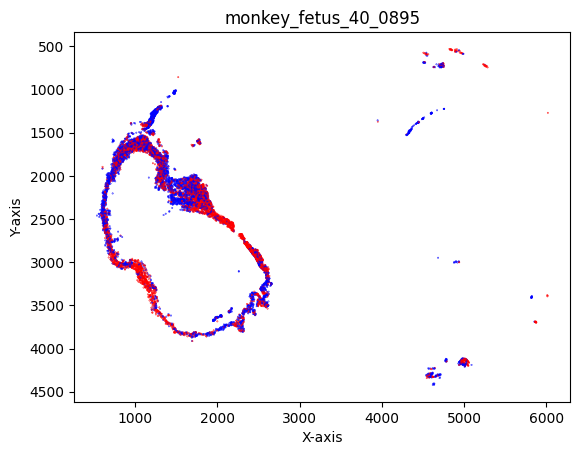

In [803]:
y = loaded_df2['Centroid_x']
x = loaded_df2['Centroid_y']

# Create scatter plot|
plt.scatter(x, y, marker='o', c = cluster_labels, cmap = cluster_colors, s=.1)
# , c=cluster_labels, cmap=cluster_colors, s=0.01
# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('monkey_fetus_40_0895')

#plt.xlim(1100, 2250)
#plt.ylim(2250, 3750)

plt.gca().invert_yaxis()

# Show the plot
plt.show()

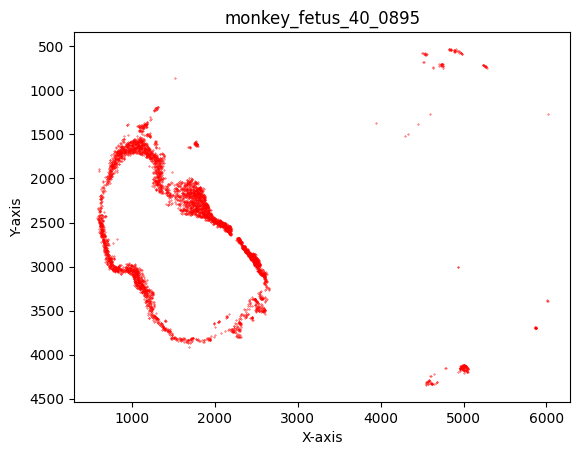

In [804]:
# Filter the DataFrame for Cluster 0
cluster_0_df = df3[df3['Cluster'] == 0]
cluster_0_df.head()

# Extract x and y coordinates for Cluster 0
y_cluster_0 = cluster_0_df['Centroid_x']
x_cluster_0 = cluster_0_df['Centroid_y']

# Create scatter plot|
plt.scatter(x_cluster_0, y_cluster_0, marker='o', c='red', s=0.1)
# , c=cluster_labels, cmap=cluster_colors, s=0.01
# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('monkey_fetus_40_0895')

#plt.xlim(1100, 2250)
#plt.ylim(2250, 3750)

plt.gca().invert_yaxis()

# Show the plot
plt.show()

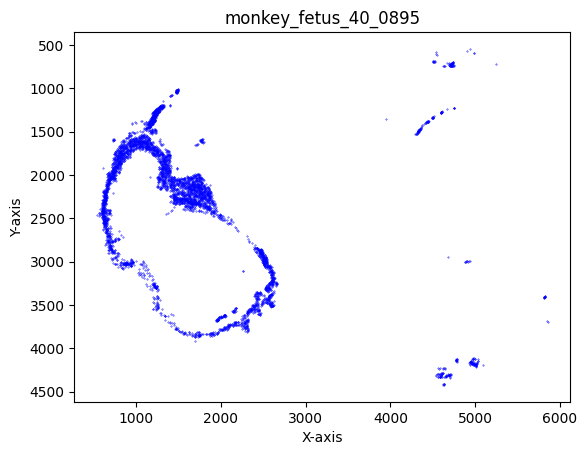

In [805]:
# Filter the DataFrame for Cluster 0
cluster_1_df = df3[df3['Cluster'] == 1]
cluster_1_df.head()

# Extract x and y coordinates for Cluster 0
y_cluster_1 = cluster_1_df['Centroid_x']
x_cluster_1 = cluster_1_df['Centroid_y']

# Create scatter plot|
plt.scatter(x_cluster_1, y_cluster_1, marker='o', c='blue', s=0.1)
# , c=cluster_labels, cmap=cluster_colors, s=0.01
# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('monkey_fetus_40_0895')

#plt.xlim(1100, 2250)
#plt.ylim(2250, 3750)

plt.gca().invert_yaxis()

# Show the plot
plt.show()

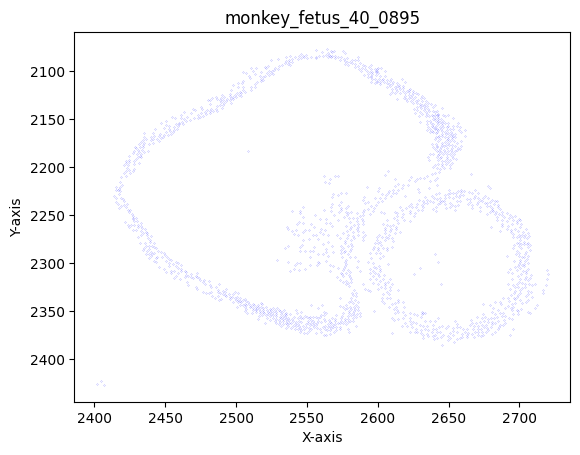

In [724]:
y = loaded_df2['Centroid_x']
x = loaded_df2['Centroid_y']

# Create scatter plot|
plt.scatter(x, y, marker='o', color='blue', s=.01)
# , c=cluster_labels, cmap=cluster_colors, s=0.01
# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('monkey_fetus_40_0895')

#plt.xlim(1100, 2250)
#plt.ylim(2250, 3750)

plt.gca().invert_yaxis()

# Show the plot
plt.show()